In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
plt.rc('font',size=15)

## Plotting results only

Makes two figures for timing the efficient algorithm. They require data `filein` that you have previously benchmarked. 

In [23]:
cM = 1.0
# cM = 3
cM = str(cM)

ylim = (0,150)
# ylim = (0,300)

# demo = 'superexponential.'
# demo = 'bottleneck.'
# demo = 'time.sel.c25.'
# demo = 'time.sel.c100.'
# demo = 'time.sel.3pg.'
demo = 'time.sel.bottle.'

# demography = 'Constant 25k'
# demography = 'Constant 100k'
# demography = 'Three phases of growth'
demography = 'Population bottleneck'

# filein = '../data/timing/' + demo + 'timing.cM' + cM + '.tsv'
filein = '../data/timing/' + demo + 'nboot5.' + cM + 'cM.tsv'
fileout = '../figures/timing/' + demo +  '-cM' + cM + '-timingv2'
# fileout = '../figures/timing/main.timing.v2'
table = pd.read_csv(filein,sep='\t')
x = np.array(list(table.columns)[1:])

idxs = [0,1,2,3]
names = ['Pruning and merging',
         'Merging',
         'Pruning',
         'Naive'
        ]
linestyle = ['solid',
             'dashed',
             'dotted',
             'dashdot'
            ]
colors = ['tab:blue',
          'tab:orange',
          'tab:green',
          'tab:red'
         ]


idxs = [0,1,2,3,4]
names = [0.00,
         0.01,
         0.02,
         0.03,
         0.04
        ]
linestyle = ['solid',
             'solid',
             'solid',
             'solid',
             'solid'
            ]
colors = ['tab:blue',
          'tab:orange',
          'tab:green',
          'tab:red',
          'tab:brown'
         ]

table.head()

,selcoef,2k,4k,8k,16k,32k,64k
0,0.00,1.293591,2.095154,0.886550,1.721054,4.509343,11.996209
1,0.01,1.279632,2.125364,1.103404,2.367717,5.942272,15.836298
2,0.02,1.338943,2.340216,2.341849,6.134103,15.076296,38.608195
3,0.03,2.246065,2.648984,3.623720,11.622890,32.730764,99.204322
4,0.04,2.797572,2.907424,5.074703,15.143399,59.342815,162.396953


#### Timing with neutral evolution

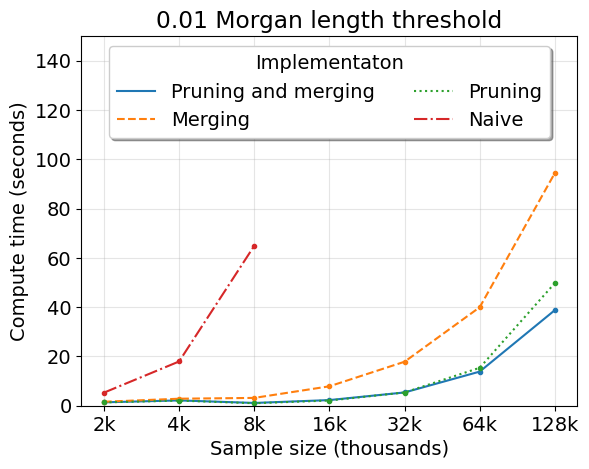

In [44]:
for j in range(len(names)):
    idx = idxs[j]
    nm = names[j]
    ls = linestyle[j]
    color = colors[j]
    row = table.iloc[idx][1:]
    row = [float(r) for r in row]
    plt.plot(x,
             row,
             '-',
             linestyle=ls,
             color=color,
             label=nm,
             # markersize=2
            )
    plt.plot(x,
             row,
             'o',
             color=color,
             markersize=3
            )
plt.legend(title='Implementaton',
           loc='upper center',
           ncol=2,
           fancybox=True,
           shadow=True
          )
plt.title(str(float(cM) * 0.01) + ' Morgan length threshold')
plt.ylabel('Compute time (seconds)')
plt.xlabel('Sample size (thousands)')
plt.ylim(ylim)
plt.grid(alpha=0.33)
# plt.savefig(fileout + '.png')
# plt.savefig(fileout + '.tiff')

#### Timing with positive selection

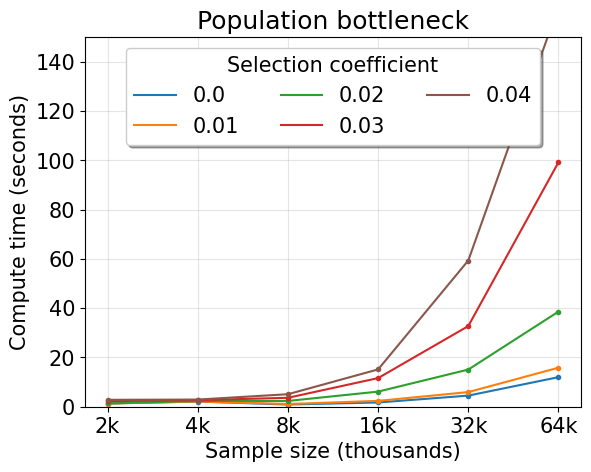

In [24]:
for j in range(len(names)):
    idx = idxs[j]
    nm = names[j]
    ls = linestyle[j]
    color = colors[j]
    row = table.iloc[idx][1:]
    row = [float(r) for r in row]
    plt.plot(x,
             row,
             '-',
             linestyle=ls,
             color=color,
             label=nm,
             # markersize=2
            )
    plt.plot(x,
             row,
             'o',
             color=color,
             markersize=3
            )
plt.legend(title='Selection coefficient',
           loc='upper center',
           ncol=3,
           fancybox=True,
           shadow=True
          )
plt.title(demography)
plt.ylabel('Compute time (seconds)')
plt.xlabel('Sample size (thousands)')
plt.ylim(ylim)
plt.grid(alpha=0.33)
# plt.savefig(fileout + '.png')
# plt.savefig(fileout + '.tiff')